In [546]:
%matplotlib inline

In [547]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np
import pandas as pd
from functools import reduce

In [548]:
def transformCards(cards):
    T = np.zeros((12,3)).astype("int32")
    T[np.arange(12), cards.reshape(3*4)] = 1
    R = T.reshape(3,4,3)
    R1 = np.array([
        reduce(np.bitwise_xor, [R[0], R[1], R[2]]),
        reduce(np.bitwise_xor, [R[0]*R[1], R[1]*R[2], R[2]*R[0]]),
        R[0]*R[1]*R[2]
    ])
    return R1

In [549]:
def generateCard(): return np.random.randint(0,3,4).astype("int32")

In [550]:
def generateSet():
    A = generateCard()
    B = generateCard()
    return transformCards(np.array([A,B,(3-(A+B)%3)%3]).astype("int32"))

In [551]:
def isSet(cards):
    return (cards.sum(axis=0)%3).sum()==0

In [552]:
def generateNonSet():
    A = generateCard()
    B = generateCard()
    while True:
        C = generateCard()
        cards = np.array([A,B,C])
        if not isSet(cards):
            return transformCards(cards)

In [553]:
cards = generateNonSet()

In [554]:
def generateDataset(N):
    Y = np.random.randint(0,2,N)
    X1 = np.array([generateSet() for _ in range(N)])
    X2 = np.array([generateNonSet() for _ in range(N)])
    return Y.reshape(N,1,1,1)*X1+(1-Y.reshape(N,1,1,1))*X2, Y

In [555]:
Xtrain, Ytrain = generateDataset(50)

In [556]:
Xtrain.shape

(50, 3, 4, 3)

In [557]:
Xtest, Ytest = generateDataset(1000)

In [558]:
model = Sequential()
model.add(Flatten())
#model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [559]:
hist = model.fit(Xtrain, Ytrain,
          batch_size=800,
          epochs=1000,
          verbose=0,
          validation_data=(Xtest, Ytest))

In [560]:
model.evaluate(Xtest, Ytest, verbose=0)

[0.35832514476776123, 0.875]

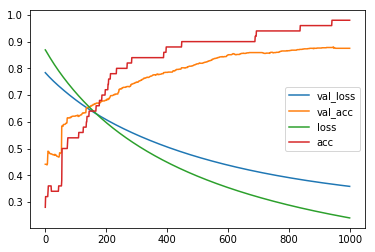

In [561]:
pd.DataFrame(hist.history).plot()

In [562]:
model.predict_classes(np.array([generateSet() for _ in range(10)]))

array([[1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1]], dtype=int32)

In [563]:
model.predict_classes(np.array([generateNonSet() for _ in range(10)]))

array([[0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0]], dtype=int32)